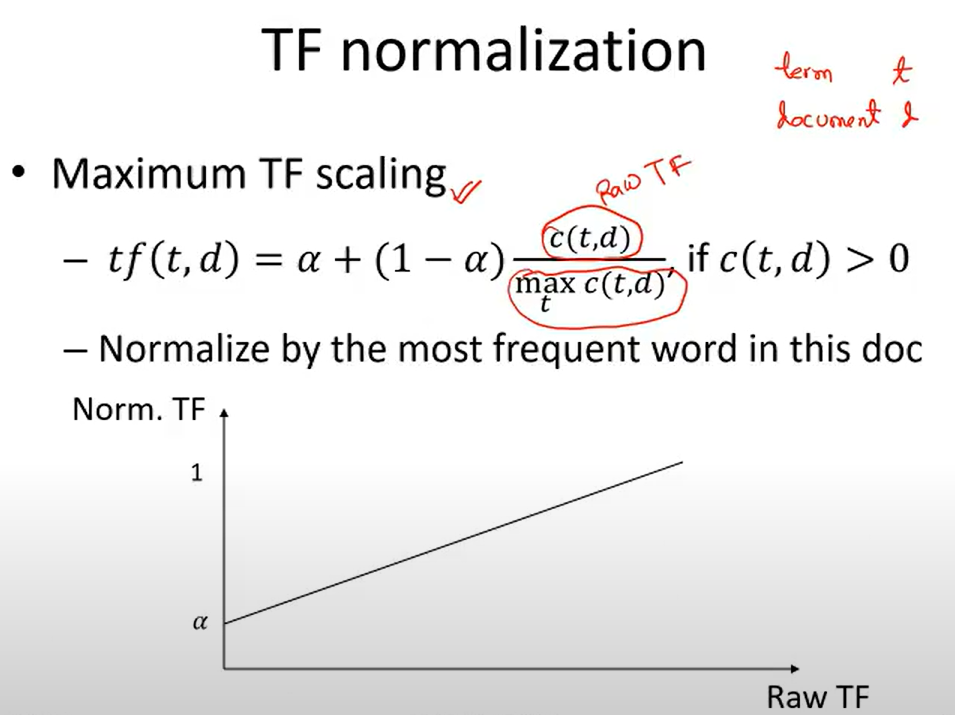

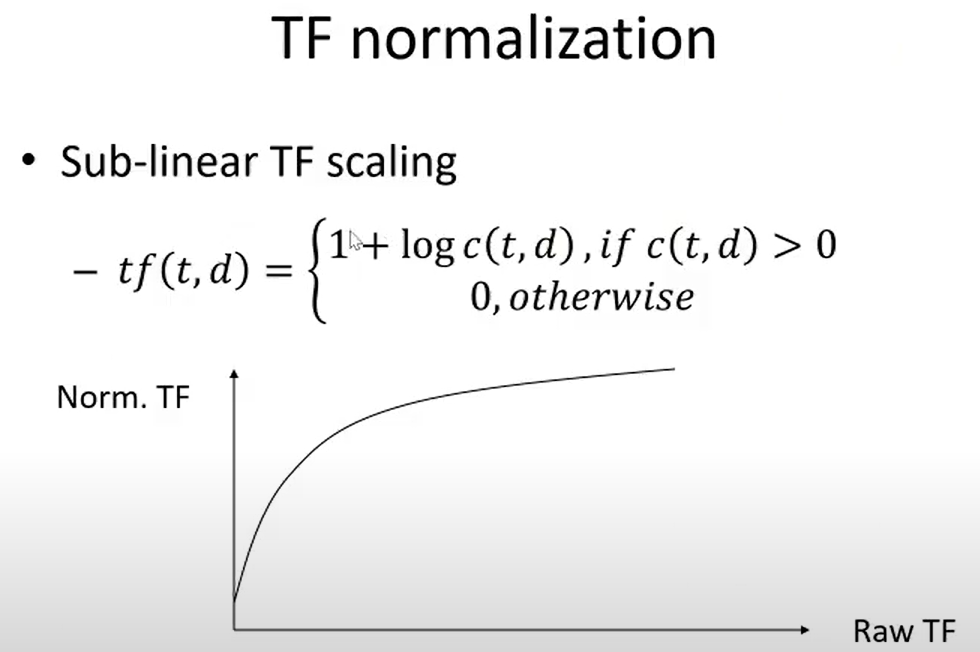

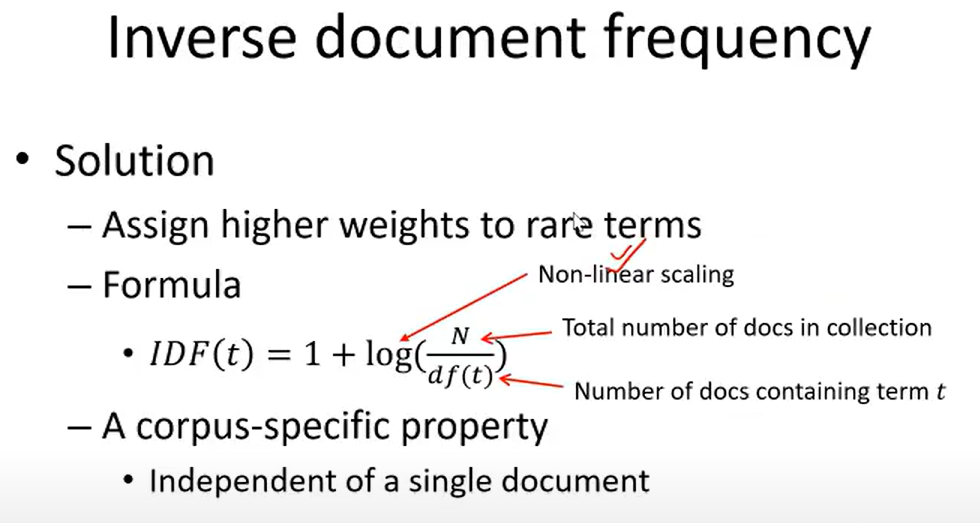

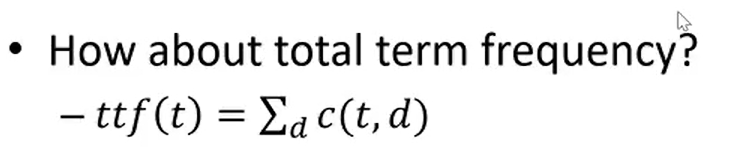

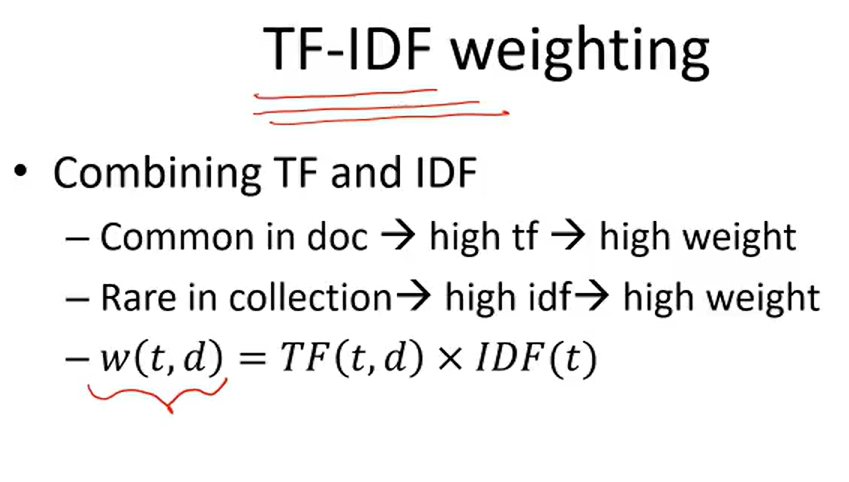

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
import numpy as np
import csv
import string
from nltk.stem.porter import *

alphabet_string = list(string.ascii_lowercase) + list(string.ascii_uppercase)
stemmer = PorterStemmer()

In [ ]:
# a. Use tokenizer to read all words

def read_documents( filename ):

  file = open(filename)
  reader = csv.reader(file)

  # Use csv reader to read all documents
  documents = []
  for row in reader:
    documents.append( row )

  return documents

def tokenize_documents ( docs ):

  tklists = []
  cats = []
  lens = []

  for i,document in enumerate(documents):
    # print('tokenizing document number', i)

    tklist = wordpunct_tokenize( document[0] )
    tklists.append(tklist)

    cat = document[1] 
    cats.append(cat)

    len = wordpunct_tokenize( document[2] )
    lens.append(len)

  return tklists, cats, lens

# c. Normalize the words.
# i.e., before stemming, make sure we are dealing with alphabet-only strings.

# define a function that:
  # takes a list of strings
  # removes all strings that don't exclusively contain alphabets
  # returns that list

def remove_non_words ( inlist, alphabets ):
  # print('input list:', inlist)
  deletion_indexes = []

  for token_number, token in enumerate(inlist):
    # print('checking token:', token)

    for character in token:
      # print('checking character:', character)
      
      if character not in alphabets:
        # print('This character is a non-alphabet. It is in token number', token_number)
        deletion_indexes.append(token_number)
        break
  
  # print('non-word token indexes to be removed:', deletion_indexes)
  for i in reversed(range(len(deletion_indexes))):
    del inlist[ int(deletion_indexes[i]) ]
    # print('non-word at index', deletion_indexes[i], 'removed')

  return inlist

# c. also before stemming, make sure we are dealing keywords that are at least two characters long.

def remove_unichar_words ( inlist ):
  # print('input list:', inlist)
  deletion_indexes = []

  for token_number, token in enumerate(inlist):
    # print('checking tsoken:', token)
  
    if len(token)<2:
      # print('Token number', token_number, 'is less than two characters long')
      deletion_indexes.append(token_number)
  
  # print('unichar token indexes to be removed:', deletion_indexes)
  for i in reversed(range(len(deletion_indexes))):
    del inlist[ int(deletion_indexes[i]) ]
  # print('all unichar strings removed.')

  return inlist

# b. use stemming
def use_stemming( inlist ):
  for tokenlist in inlist:
    for token in tokenlist:
      token = stemmer.stem(token)
    return inlist

In [ ]:
#apply all pre-processing on the token list of first [:10] documents

documents = read_documents ('reddit.csv')
tokenlists, categories, length = tokenize_documents('reddit.csv')

for tokenlist in tokenlists[:10]:
  tokenlist = remove_non_words ( tokenlist , alphabet_string )
  tokenlist = remove_unichar_words ( tokenlist )
  tokenlist = [stemmer.stem(token) for token in tokenlist]


In [ ]:
# get rid of title row
tokenlists = tokenlists[1:]
tokenlists